<a href="https://colab.research.google.com/github/serenazly/ECON441B/blob/main/HW4_IN_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the Credit Card Fraud Data From CCLE

In [90]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [91]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [92]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/fraudTest.csv")

In [93]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [94]:
df_select = df[['trans_date_trans_time','category','amt','city_pop','is_fraud']]
df_select

,trans_date_trans_time,category,amt,city_pop,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,333497,0
1,2020-06-21 12:14:33,personal_care,29.84,302,0
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0
4,2020-06-21 12:15:17,travel,3.19,1126,0
...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519,0
555715,2020-12-31 23:59:09,kids_pets,111.84,28739,0
555716,2020-12-31 23:59:15,kids_pets,86.88,3684,0
555717,2020-12-31 23:59:24,travel,7.99,129,0


In [95]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [96]:
df_select = df[['trans_date_trans_time','category','amt','city_pop','is_fraud']]

In [97]:
df_select['time_variable'] = [i.hour for i in df['trans_date_trans_time']]
df_select

<ipython-input-97-b5a1d02cf768>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_variable'] = [i.hour for i in df['trans_date_trans_time']]


,trans_date_trans_time,category,amt,city_pop,is_fraud,time_variable
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,12
1,2020-06-21 12:14:33,personal_care,29.84,302,0,12
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,12
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0,12
4,2020-06-21 12:15:17,travel,3.19,1126,0,12
...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519,0,23
555715,2020-12-31 23:59:09,kids_pets,111.84,28739,0,23
555716,2020-12-31 23:59:15,kids_pets,86.88,3684,0,23
555717,2020-12-31 23:59:24,travel,7.99,129,0,23


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X = pd.get_dummies(df_select,['category']).drop(['trans_date_trans_time','is_fraud'],axis = 1) 
y = df['is_fraud']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [101]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [102]:
ros = RandomOverSampler(random_state = 0)
x_over, y_over = ros.fit_resample(X_train,y_train)

rus = RandomUnderSampler(random_state = 0)
x_under, y_under = rus.fit_resample(X_train,y_train)

In [103]:
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(X_train,y_train)

# 3.) Train three logistic regression models 

In [104]:
from sklearn.linear_model import LogisticRegression
model_ros = LogisticRegression()
model_rus = LogisticRegression()
model_smote = LogisticRegression()

In [105]:
# Train on oversample data
model_ros.fit(x_over, y_over)

LogisticRegression()

In [106]:
# Train on undersample data
model_rus.fit(x_under, y_under)

LogisticRegression()

In [107]:
# Train on smote data
model_smote.fit(x_smote, y_smote)

LogisticRegression()

# 4.) Test the three models

In [108]:
y_pred_ros = model_ros.predict(X_test)
y_pred_rus = model_rus.predict(X_test)
y_pred_smote = model_smote.predict(X_test)


In [109]:
# Accuracy of each model
from sklearn.metrics import accuracy_score
accuracy_ros = accuracy_score(y_test, y_pred_ros)
accuracy_rus = accuracy_score(y_test, y_pred_rus)
accuracy_smote = accuracy_score(y_test, y_pred_smote)

print("Random Over-sampler accuracy:", accuracy_ros)
print("Random Under-sampler accuracy:", accuracy_rus)
print("SMOTE accuracy:", accuracy_smote)

Random Over-sampler accuracy: 0.807690923486648
Random Under-sampler accuracy: 0.8103061493797836
SMOTE accuracy: 0.8185597063269272


# 5.) Which performed best in Out of Sample metrics?

In [110]:
# Model that was trained on smote data performed best in out of sample metrics.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [111]:
raw = pd.concat([X_train, y_train], axis = 1)

Text(0, 0.5, 'Population')

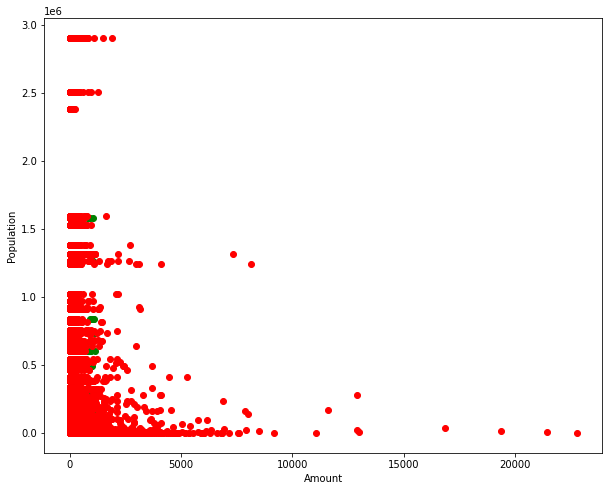

In [122]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(raw[raw['is_fraud']==1]['amt'],raw[raw['is_fraud']==1]['city_pop'],label='is_fraud = 1', color = 'g')
plt.scatter(raw[raw['is_fraud']==0]['amt'],raw[raw['is_fraud']==0]['city_pop'],label='is_fraud = 0', color = 'r')
plt.xlabel('Amount')
plt.ylabel('Population')
# The green ones are mostly covered by red ones

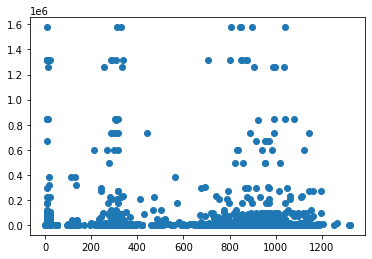

In [113]:
plt.scatter(raw[raw['is_fraud']==1]['amt'],raw[raw['is_fraud']==1]['city_pop'])
plt.show()

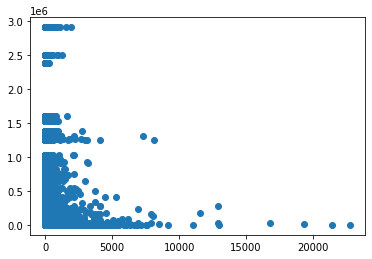

In [119]:
plt.scatter(raw[raw['is_fraud']==0]['amt'],raw[raw['is_fraud']==0]['city_pop'])
plt.show()

In [114]:
# Alternative way
X = df[['amt', 'city_pop']]
y = df['is_fraud']

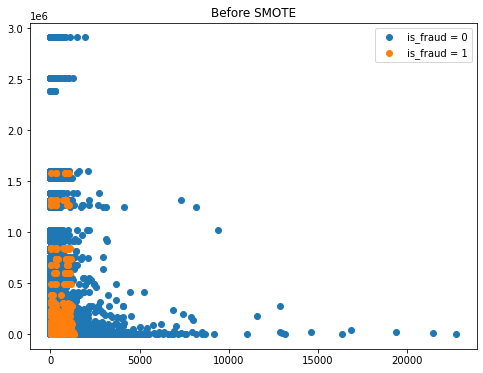

In [123]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0]['amt'], X[y == 0]['city_pop'], label='is_fraud = 0')
plt.scatter(X[y == 1]['amt'], X[y == 1]['city_pop'], label='is_fraud = 1')
plt.legend()
plt.title('Before SMOTE')
plt.show()

In [116]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

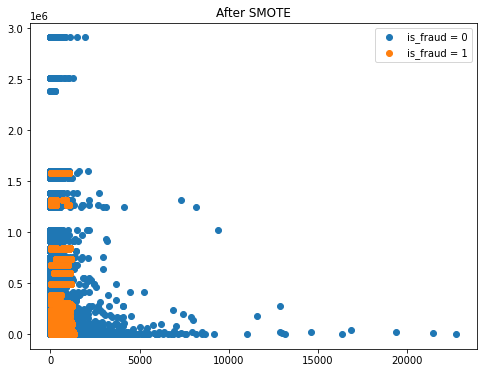

In [124]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0]['amt'], X_resampled[y_resampled == 0]['city_pop'], label='is_fraud = 0')
plt.scatter(X_resampled[y_resampled == 1]['amt'], X_resampled[y_resampled == 1]['city_pop'], label='is_fraud = 1')
plt.legend()
plt.title('After SMOTE')
plt.show()


In [117]:
# There are significantly more orange dots(when is_fraud = 1)